# keras tutorial using kaggle digits dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get the train and test image digit dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# define labels and feature matrix
X_train=train.drop(labels = ["label"],axis = 1) 
Y_train=train['label']

In [6]:
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [7]:
# count number of labels from each class
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

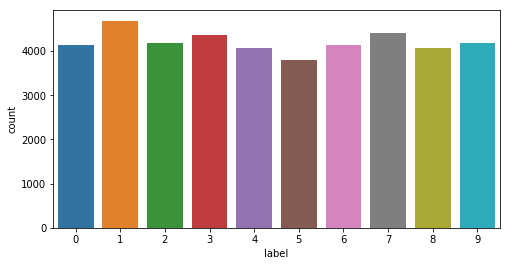

In [8]:
#count number of labels from each class and plots these labels distribution
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=train);

In [9]:
#Normalizing data
X_train=X_train.astype('float32')/255
test=test.astype('float32')/255

In [10]:
#Reshape
#Reshaping image into 3D matrix for network
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [11]:
X_train.shape

(42000, 28, 28, 1)

In [12]:
test.shape

(28000, 28, 28, 1)

In [13]:
# converts labels into categorical function
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

Y_train.shape
print(Y_train[:5])

Using TensorFlow backend.


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
Y_train.shape

(42000, 10)

In [15]:
#Now we will split training data into training data and validation data
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

In [16]:
X_train.shape

(37800, 28, 28, 1)

In [17]:
Y_train.shape

(37800, 10)

In [19]:
X_valid.shape

(4200, 28, 28, 1)

In [20]:
Y_valid.shape

(4200, 10)

Text(0.5, 1.0, '6')

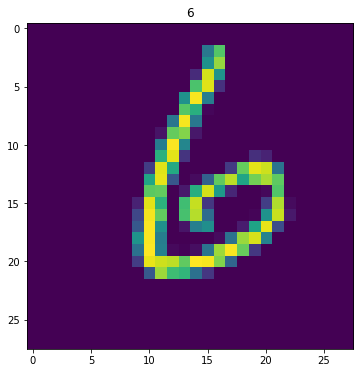

In [23]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[2][:,:,0])
plt.title(Y_train[2].argmax())

In [27]:
#Defining cnn model
import keras
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from keras import backend as K
from keras.optimizers import RMSprop

In [28]:
num_classes=10
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(), metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               48128     
__________

In [31]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_modellstmmulti.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=4)
]
BATCH_SIZE = 100
EPOCHS = 50

history = model.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.1,
                      verbose=1)


Train on 34020 samples, validate on 3780 samples
Epoch 1/50
34020/34020 [==============================] - 21s 631us/step - loss: 0.3946 - acc: 0.8737 - val_loss: 0.2049 - val_acc: 0.9357
Epoch 2/50
34020/34020 [==============================] - 21s 608us/step - loss: 0.1061 - acc: 0.9669 - val_loss: 0.0740 - val_acc: 0.9791
Epoch 3/50
34020/34020 [==============================] - 20s 601us/step - loss: 0.0777 - acc: 0.9765 - val_loss: 0.0892 - val_acc: 0.9690
Epoch 4/50
34020/34020 [==============================] - 21s 619us/step - loss: 0.0622 - acc: 0.9813 - val_loss: 0.0953 - val_acc: 0.9706
Epoch 5/50
34020/34020 [==============================] - 21s 604us/step - loss: 0.0540 - acc: 0.9824 - val_loss: 0.0584 - val_acc: 0.9839
Epoch 6/50
34020/34020 [==============================] - 20s 598us/step - loss: 0.0497 - acc: 0.9839 - val_loss: 0.0498 - val_acc: 0.9854
Epoch 7/50
34020/34020 [==============================] - 21s 613us/step - loss: 0.0424 - acc: 0.9857 - val_loss: 0.0

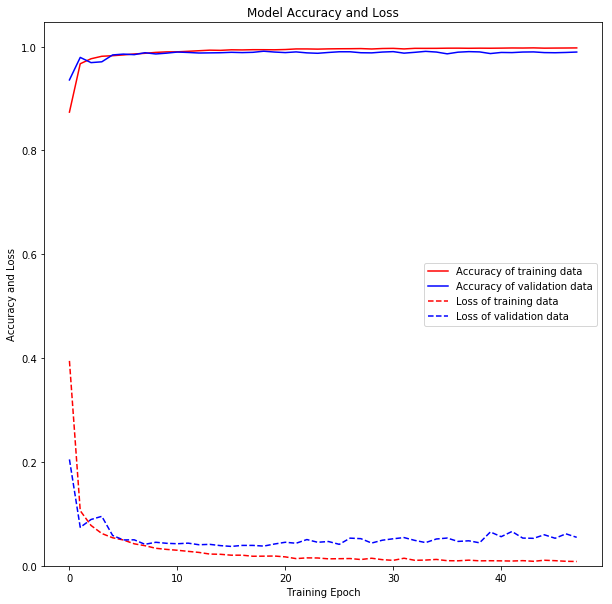

In [32]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


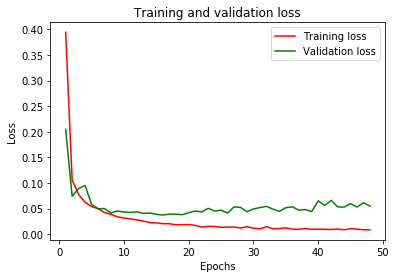

In [33]:
#model Evaluation
#4.1 plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

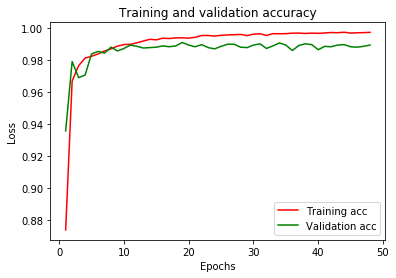

In [34]:
#plotting training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
#%accuracy on test data
score = model.evaluate(X_valid, Y_valid, verbose=1)
print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

4200/4200 [==============================] - 1s 242us/step

Accuracy on test data: 0.99

Loss on test data: 0.05


In [38]:
# plot ROC curves for binary classifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model1prediction=model.predict(X_valid)

In [39]:
model1prediction.shape

(4200, 10)

In [40]:
print(model1prediction[:5])

[[2.09933982e-15 3.55169893e-14 1.80762016e-10 6.80476508e-12
  1.31776304e-16 2.93494766e-17 1.16796158e-19 9.29670498e-15
  1.00000000e+00 1.20724664e-09]
 [6.09404766e-14 1.00000000e+00 9.49732827e-12 9.78458032e-22
  1.91196881e-09 5.24507947e-17 1.52720111e-12 5.76170400e-09
  1.19821785e-12 3.52976919e-11]
 [2.38956825e-15 2.24764846e-12 5.24546986e-13 1.35600916e-12
  6.87611958e-08 9.55685704e-12 1.07850885e-17 1.08521969e-09
  4.44777298e-10 9.99999881e-01]
 [7.04124526e-17 3.07412461e-15 3.85273038e-14 2.63677058e-15
  2.49471804e-10 2.07991020e-11 4.09072898e-20 2.02145785e-08
  8.68218778e-12 1.00000000e+00]
 [1.46672563e-25 2.55467997e-23 1.88010915e-20 5.34467202e-18
  1.07988796e-25 2.53719850e-23 2.53745600e-26 4.49131670e-26
  1.00000000e+00 7.60050925e-19]]


In [47]:
model1prediction1=model1prediction[:,1]

In [49]:
print(model1prediction1.shape)
print(model1prediction1[:5])

(4200,)
[3.5516989e-14 1.0000000e+00 2.2476485e-12 3.0741246e-15 2.5546800e-23]


In [44]:
max_y_test = np.argmax(Y_valid, axis=1)

In [53]:
max_y_test.shape

(4200,)

In [ ]:
#%accuracy on test data
score = modelnew.evaluate(X_valid, Y_valid, verbose=1)
print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

In [54]:
for layer in model.layers:
    print(layer)

In [55]:
# how to inspect the each layer of modelmodel.get_config()

[{'class_name': 'Conv2D',
  'config': {'name': 'conv2d_5',
   'trainable': True,
   'batch_input_shape': (None, 28, 28, 1),
   'dtype': 'float32',
   'filters': 30,
   'kernel_size': (5, 5),
   'strides': (1, 1),
   'padding': 'valid',
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'MaxPooling2D',
  'config': {'name': 'max_pooling2d_5',
   'trainable': True,
   'pool_size': (2, 2),
   'padding': 'valid',
   'strides': (2, 2),
   'data_format': 'channels_last'}},
 {'class_name': 'Conv2D',
  'config': {'name': 'conv2d_6',
   'trainable': 

In [56]:
model.layers[0].get_config()

{'name': 'conv2d_5',
 'trainable': True,
 'batch_input_shape': (None, 28, 28, 1),
 'dtype': 'float32',
 'filters': 30,
 'kernel_size': (5, 5),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [57]:
model.layers[1].get_config()

{'name': 'max_pooling2d_5',
 'trainable': True,
 'pool_size': (2, 2),
 'padding': 'valid',
 'strides': (2, 2),
 'data_format': 'channels_last'}

In [58]:
model.layers[2].get_config()

{'name': 'conv2d_6',
 'trainable': True,
 'filters': 15,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [59]:
model.layers[3].get_config()

{'name': 'max_pooling2d_6',
 'trainable': True,
 'pool_size': (2, 2),
 'padding': 'valid',
 'strides': (2, 2),
 'data_format': 'channels_last'}

In [60]:
model.layers[4].get_config()

{'name': 'dropout_3',
 'trainable': True,
 'rate': 0.2,
 'noise_shape': None,
 'seed': None}

In [61]:
model.layers[5].get_config()

{'name': 'flatten_3', 'trainable': True}

In [62]:
model.layers[6].get_config()

{'name': 'dense_6',
 'trainable': True,
 'units': 128,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [63]:
model.layers[7].get_config()

{'name': 'dense_7',
 'trainable': True,
 'units': 50,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [64]:
model.layers[8].get_config()

{'name': 'dense_8',
 'trainable': True,
 'units': 10,
 'activation': 'softmax',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [69]:
print(model.layers[0].input_shape)
print(model.layers[0].output_shape)
print(model.layers[1].input_shape)
print(model.layers[1].output_shape)
print(model.layers[2].input_shape)
print(model.layers[2].output_shape)
print(model.layers[3].input_shape)
print(model.layers[3].output_shape)
print(model.layers[4].input_shape)
print(model.layers[4].output_shape)
print(model.layers[5].input_shape)
print(model.layers[5].output_shape)
print(model.layers[6].input_shape)
print(model.layers[6].output_shape)
print(model.layers[7].input_shape)
print(model.layers[7].output_shape)
print(model.layers[8].input_shape)
print(model.layers[8].output_shape)

(None, 28, 28, 1)
(None, 24, 24, 30)
(None, 24, 24, 30)
(None, 12, 12, 30)
(None, 12, 12, 30)
(None, 10, 10, 15)
(None, 10, 10, 15)
(None, 5, 5, 15)
(None, 5, 5, 15)
(None, 5, 5, 15)
(None, 5, 5, 15)
(None, 375)
(None, 375)
(None, 128)
(None, 128)
(None, 50)
(None, 50)
(None, 10)


In [71]:
# count the parameters in each layer and complete model
model.layers[0].count_params()
print(model.layers[0].count_params())
print(model.layers[1].count_params())
print(model.layers[2].count_params())
print(model.layers[3].count_params())
print(model.layers[4].count_params())
print(model.layers[5].count_params())
print(model.layers[6].count_params())
print(model.layers[7].count_params())
print(model.layers[8].count_params())

780
0
4065
0
0
0
48128
6450
510


In [72]:
# dispaly the weights and biases of each trainable layer in the network
model.layers[0].get_weights()

[array([[[[-1.37243137e-01,  6.07837327e-02,  6.48896545e-02,
            1.69403423e-02,  1.59990534e-01, -1.13212289e-02,
            2.07557961e-01, -2.48336773e-02, -1.50940329e-01,
            2.57281184e-01,  9.68661830e-02,  5.33147603e-02,
           -1.80480536e-02,  1.57751113e-01,  4.58349772e-02,
           -2.38999799e-01, -1.27454728e-01,  5.32940850e-02,
            9.31089651e-03,  1.75784290e-01,  7.30737075e-02,
            5.73544987e-02, -8.74946341e-02,  4.61773947e-02,
           -1.94279522e-01, -2.67310236e-02, -7.90503547e-02,
           -1.45813450e-01,  1.07641235e-01, -8.35294276e-02]],
 
         [[-3.52805504e-03,  9.70070343e-03, -2.08714217e-01,
           -2.04297632e-01,  4.65521775e-02,  1.28042117e-01,
            3.25336196e-02, -4.22399520e-04, -3.18374693e-01,
            6.04610667e-02,  5.17282970e-02,  1.37862831e-01,
            1.90504398e-02, -6.45543821e-03,  8.62861350e-02,
            9.28774402e-02, -3.05291295e-01, -3.25733982e-02,
    

In [76]:
# weight of first onvolutional layer
model.layers[0].get_weights()[0]
model.layers[0].get_weights()[0].shape

(5, 5, 1, 30)

In [75]:
# bias of first convolutional layer 
model.layers[0].get_weights()[1].shape

(30,)

In [78]:
model.layers[1].get_weights() # no weights due to pooling layer

[]

In [81]:
model.layers[2].get_weights()[0].shape

(3, 3, 30, 15)

In [82]:
model.layers[2].get_weights()[1].shape

(15,)

In [83]:
model.layers[3].get_weights()

[]

In [84]:
model.layers[4].get_weights()

[]

In [85]:
model.layers[5].get_weights()

[]

In [87]:
model.layers[6].get_weights()[0].shape

(375, 128)

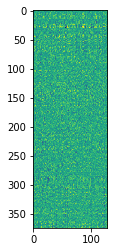

In [94]:
plt.imshow(model.layers[6].get_weights()[0])

In [88]:
model.layers[6].get_weights()[1].shape

(128,)

In [90]:
print(model.layers[7].get_weights()[0].shape)
print(model.layers[7].get_weights()[1].shape)

(128, 50)
(50,)


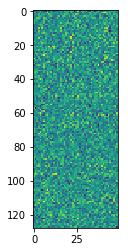

In [95]:
plt.imshow(model.layers[7].get_weights()[0])

In [91]:
print(model.layers[8].get_weights()[0].shape)
print(model.layers[8].get_weights()[1].shape)

(50, 10)
(10,)


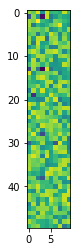

In [96]:
plt.imshow(model.layers[8].get_weights()[0])

In [97]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]

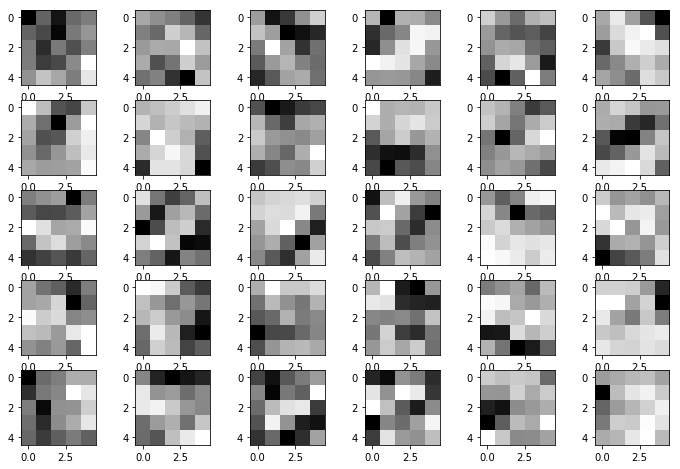

In [98]:
# function to get weights of convolutional layer
col_size = 6
row_size = 5
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [100]:
weight_conv2d_3 = model.layers[2].get_weights()[0][:,:,0,:]

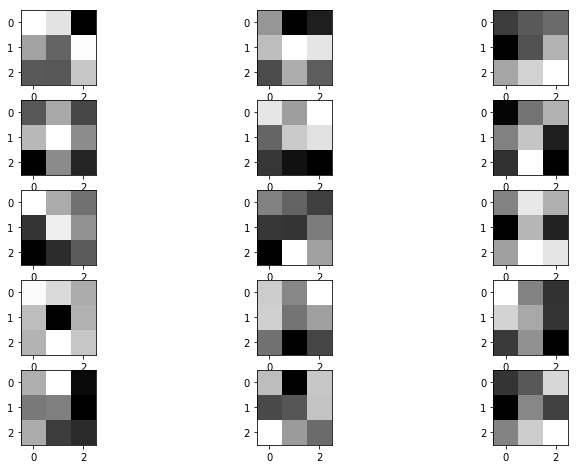

In [102]:
# function to get weights of convolutional layer
col_size = 3
row_size = 5
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_3[:,:,filter_index],cmap="gray")
    filter_index += 1

In [104]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]

In [106]:
print(layer_outputs)

[<tf.Tensor 'conv2d_5/Relu:0' shape=(?, 24, 24, 30) dtype=float32>, <tf.Tensor 'max_pooling2d_5/MaxPool:0' shape=(?, 12, 12, 30) dtype=float32>, <tf.Tensor 'conv2d_6/Relu:0' shape=(?, 10, 10, 15) dtype=float32>, <tf.Tensor 'max_pooling2d_6/MaxPool:0' shape=(?, 5, 5, 15) dtype=float32>, <tf.Tensor 'dropout_3/cond/Merge:0' shape=(?, 5, 5, 15) dtype=float32>, <tf.Tensor 'flatten_3/Reshape:0' shape=(?, ?) dtype=float32>, <tf.Tensor 'dense_6/Relu:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'dense_7/Relu:0' shape=(?, 50) dtype=float32>, <tf.Tensor 'dense_8/Softmax:0' shape=(?, 10) dtype=float32>]


In [107]:
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [108]:
model.input.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [111]:
print(activation_model)

In [113]:
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))

In [119]:
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)
print(activations[8].shape)

(1, 24, 24, 30)
(1, 12, 12, 30)
(1, 10, 10, 15)
(1, 5, 5, 15)
(1, 5, 5, 15)
(1, 375)
(1, 128)
(1, 50)
(1, 10)


In [ ]:
#Visualize CNN Layers
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))

In [129]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

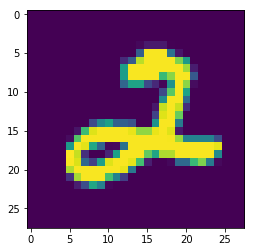

In [130]:
#Displaying original Image
plt.imshow(X_train[11][:,:,0])

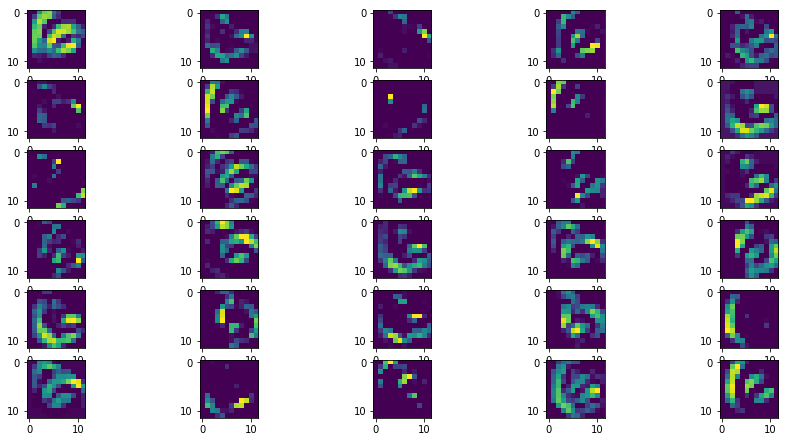

In [131]:
#Desplaying above image after layer 2 .
#layer 1 is input layer .

display_activation(activations, 5, 6, 1)

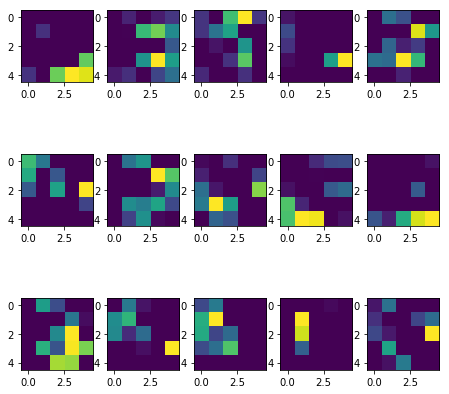

In [132]:
#Displaying output of layer 4
display_activation(activations, 5, 3, 3)

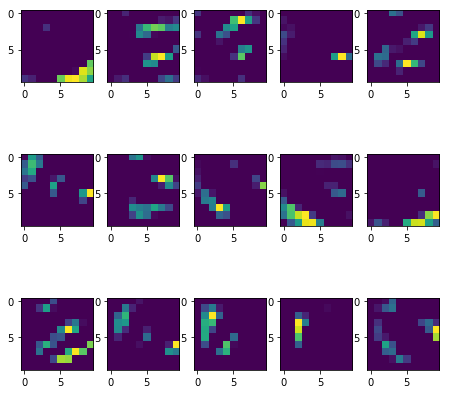

In [133]:
#Displaying output of layer 4
display_activation(activations, 5, 3, 2)

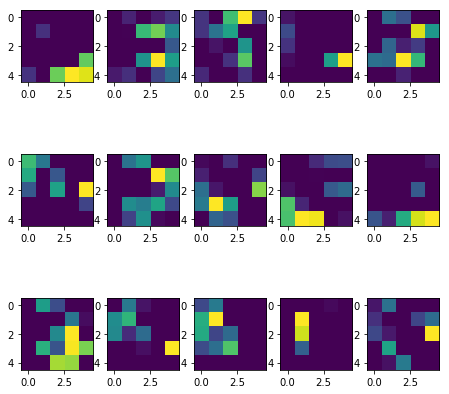

In [134]:
#Displaying output of layer 4
display_activation(activations, 5, 3, 4)

In [139]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

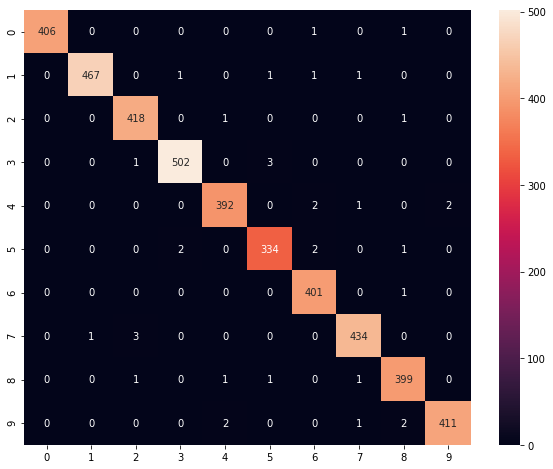

In [140]:

#confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

In [138]:
results.shape

(28000,)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      0.99      0.99       471
           2       0.99      1.00      0.99       420
           3       0.99      0.99      0.99       506
           4       0.99      0.99      0.99       397
           5       0.99      0.99      0.99       339
           6       0.99      1.00      0.99       402
           7       0.99      0.99      0.99       438
           8       0.99      0.99      0.99       403
           9       1.00      0.99      0.99       416

   micro avg       0.99      0.99      0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

